In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [2]:
os.chdir(os.path.dirname(os.getcwd()))

In [3]:
from pathlib import Path, PureWindowsPath
path = PureWindowsPath(os.getcwd() + "\\data\\input\\data.parquet")
path = path.as_posix()
corpus = pd.read_parquet(path) #engine="fastparquet"
# corpus = pd.read_parquet(os.path.dirname(path), engine="fastparquet")
corpus["id"] = list(range(len(corpus)))
corpus = corpus.sort_values("id")
corpus

id                                                      message  \
index                                                                      
0         0  Nous avons vu [quoi est Dieu](https://parlafoi.fr/2019/0...   
1         1  Peut-il faire que les choses passées n’aient pas été ? Non.   
2         2  Peut-il faire les choses qu’il ne fait pas ou omettre ce...   
3         3            ## Article 1 : Y-a-t-il en Dieu de la puissance ?   
4         4  > On dit dans le psaume 89.9 : « Tu es Puissant Seigneur...   
...     ...                                                          ...   
8223   8223  Le baptême ne peut être administré que par un pasteur ou...   
8224   8224  [![Quand Dieu promet que nos enfants font partie de la N...   
8225   8225  ## [Quand Dieu promet que nos enfants font partie de la ...   
8226   8226    1. [Une Défense Exégétique de la Loi Naturelle (2/6) :...   
8227   8227  Votre adresse e-mail ne sera pas publiée. Les champs obl...   

                                              message_preprocessed  \
index                                                                
0      vu quoi dieuhttpsparlafoifrles-cinq-voies- de-thomas-daq...   
1                                   peut-il faire chose passée non   
2                 peut-il faire chose fait omettre celles fait oui   
3                                  article y-a-t-il dieu puissance   
4      dit psaume « puissant seigneur vérité entoure » thomas a...   
...                                                            ...   
8223   baptême peut être administré pasteur a commission dès se...   
8224   quand dieu promet enfant font partie nouvelle allianceht...   
8225   quand dieu promet enfant font partie nouvelle allianceht...   
8226   défense exégétique loi naturel ancien testament - foihtt...   
8227            adresse e-mail publiée champ obligatoires indiqués   

         category  length  
index                      
0      philosophy     667  
1      philosophy      59  
2      philosophy      78  
3      philosophy      49  
4      philosophy     124  
...           ...     ...  
8223      baptism     832  
8224      baptism     274  
8225      baptism     178  
8226      baptism     308  
8227      baptism      86  

[8228 rows x 5 columns]

In [3]:
corpus["category"].value_counts()

philosophy    5177
baptism       3051
Name: category, dtype: int64

In [4]:
#Verifier qu'il n'y a pas d'id en doublon
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())

False
False


(0.0, 600.0)

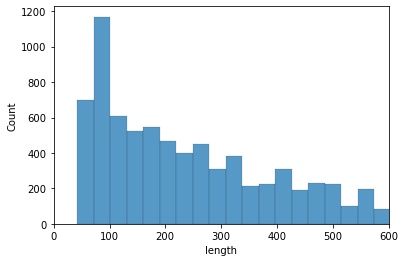

In [5]:
sb.histplot(data=corpus, x="length")
plt.xlim(0, 600)

In [4]:
X = corpus["message_preprocessed"]
y = corpus["category"]

In [5]:
# Methode 1 : CountVectorizer puis TfidfTransformer 
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [6]:
# Methode 2 : TfidfVectorizer (CountVectorizer + TfidfTransformer en meme temps)
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)
tfidf_vect.get_feature_names_out()

array(['aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds',
       'aaen', 'aaron', ..., 'טבל', 'יהוה', 'ἔθνη'], dtype=object)

In [9]:
#Dimensions de la matrice
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_tfidf.shape) # = (nb_documents, nb_mots)
print("X_tfidf :")
print(type(X_tfidf))
print(X_tfidf)

corpus.shape = (8228, 5)
X_tfidf.shape = (8228, 12950)
X_tfidf :
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 9310)	0.0676163965363802
  (0, 8220)	0.10405048562122729
  (0, 836)	0.08892541942094587
  (0, 11640)	0.12813829828325518
  (0, 11343)	0.10849318951254834
  (0, 8273)	0.09161069623050055
  (0, 8809)	0.10498916187268116
  (0, 9460)	0.07888594394459283
  (0, 8733)	0.09679056061112536
  (0, 12353)	0.10821343109087218
  (0, 8507)	0.05355489229594013
  (0, 1928)	0.12390604341382504
  (0, 3093)	0.10686603659683235
  (0, 7114)	0.12109510592441985
  (0, 1750)	0.0679871746586059
  (0, 1169)	0.09315796896236794
  (0, 2921)	0.10510938728976266
  (0, 12872)	0.11301323208297374
  (0, 4621)	0.05692426973157179
  (0, 7618)	0.1303222052206023
  (0, 408)	0.0782078905322544
  (0, 9583)	0.12994270247250952
  (0, 12368)	0.11519713902032089
  (0, 12227)	0.1303222052206023
  (0, 10624)	0.1303222052206023
  :	:
  (8226, 3677)	0.20127850055514585
  (8226, 2269)	0.1779810982745558
  (8226, 585)	0.1364367

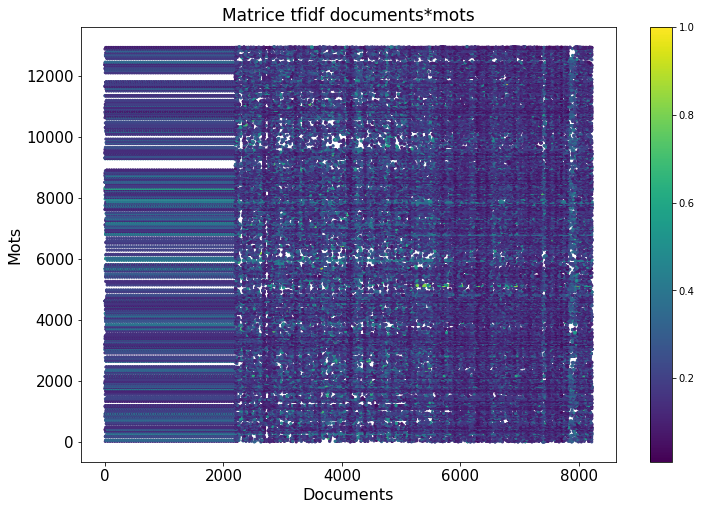

In [21]:
#Plot 1 de la matrice (avec un scatterplot de matplotlib)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_matplotlib.png")
path = path.as_posix()

X_tfidf_dict = X_tfidf.todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))
plt.scatter(X_tfidf_xy[:,0], X_tfidf_xy[:,1], s=5, c=X_tfidf_val)
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice tfidf documents*mots", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar()
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

In [19]:
#Plot 2 de la matrice (avec scatterplot de seaborn)
X_tfidf_dict = X_tfidf.todok()
# X_tfidf_dict = X_tfidf[:10000,:].todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))

C:\Users\eupho\AppData\Local\Temp/ipykernel_25428/88882922.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(path)
c:\Users\eupho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


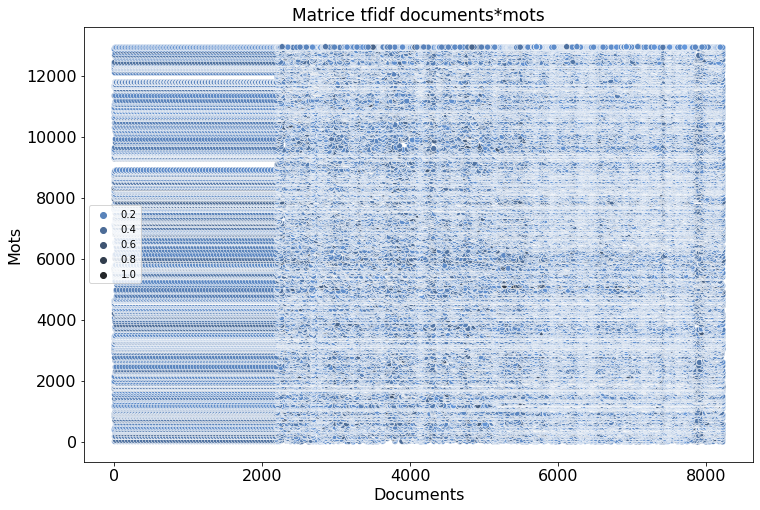

In [20]:
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_seaborn.png")
path = path.as_posix()

sb.scatterplot(x=X_tfidf_xy[:,0], y=X_tfidf_xy[:,1], hue=X_tfidf_val, palette=sb.dark_palette("#69d", reverse=True, as_cmap=True))
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice tfidf documents*mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

In [16]:
# Informations sur la matrice #
# Nombre de valeurs non nulles
print("nombre de valeurs non nulles (taille de la matrice csr) =", X_tfidf.count_nonzero())

# Intervalle des valeurs 
print("intervalle des valeurs [{} ; {}]".format(X_tfidf.min(), X_tfidf.max()))

# Valeurs uniques avec unique()
X_tfidf_unique = np.unique(X_tfidf.data)
print("valeurs uniques =", X_tfidf_unique)

# Nombre de valeurs uniques (auquel on additionne 1 pour les 0 qui ne sont pas stockees par definition)
print("nombre de valeurs uniques =", X_tfidf_unique.shape[0] + 1)

nombre de valeurs non nulles (taille de la matrice csr) = 190581
intervalle des valeurs [0.0 ; 1.0]
valeurs uniques = [0.0096 0.0105 0.0114 ... 0.8415 0.9017 1.0000]
nombre de valeurs uniques = 99923


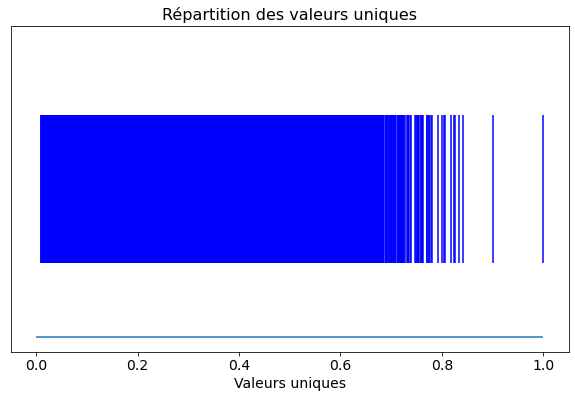

In [17]:
# Graphique avec barres en 1D des valeurs uniques (pour voir comment elles sont reparties, que a droite ?, que a gauche ?, etc.)
# sb.scatterplot(x=X_tfidf_unique, y=np.zeros_like(X_tfidf_unique), sizes=(10000,10000))
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_unique_distribution.png")
path = path.as_posix()

plt.figure()
plt.hlines(0,0,1)  # Draw a horizontal line
plt.eventplot(X_tfidf_unique, orientation='horizontal', colors='b')
plt.xlabel("Valeurs uniques", size=14)
plt.title("Répartition des valeurs uniques", size=16)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (9, 4)
plt.savefig(path)
plt.show()

In [50]:
os.getcwd()

'c:\\Users\\eupho\\OneDrive\\Documents\\perso\\projets\\classification_texte_bapteme_philo\\clustering'

In [7]:
os.getcwd() 

'c:\\Users\\eupho\\OneDrive\\Documents\\perso\\projets\\classification_texte_bapteme_philo'

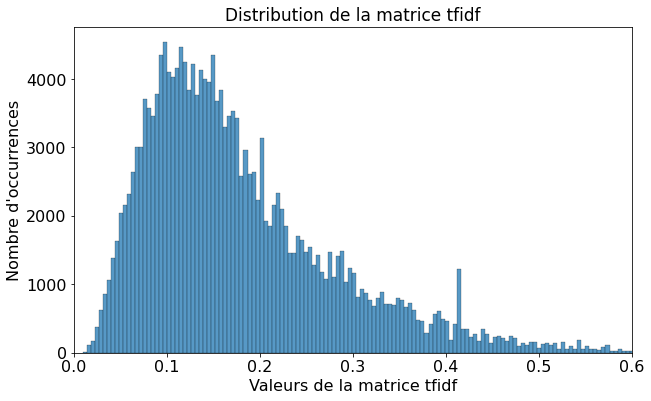

In [14]:
# Distribution des valeurs
# values, counts = np.unique(X_tfidf.data, return_counts=True)
# value_counts = np.asarray((values, counts)).T

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_tfidf.data)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()


In [11]:
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()
plt.savefig(path)

<Figure size 720x432 with 0 Axes>

# Reduction de dimensions pour potentiellement observer des clusters

In [23]:
print("number of dimensions at the beginninig =", X_tfidf.shape)

number of dimensions at the beginninig = (8228, 12950)


TruncatedSVD

In [326]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X_tfidf_svd = svd.fit_transform(X_tfidf)

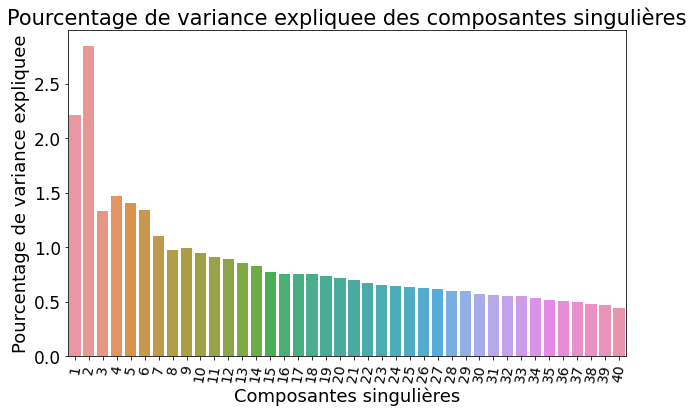

In [327]:
# Pourcentage de variance expliquee des composantes singulieres
df_explained_var = pd.DataFrame(list(zip(range(1, 41), svd.explained_variance_ratio_[:40] * 100)))
sb.barplot(data=df_explained_var, x=0, y=1)
plt.xlabel("Composantes singulières", size=18)
plt.ylabel("Pourcentage de variance expliquee", size=18)
plt.title("Pourcentage de variance expliquee des composantes singulières", size=21)
plt.xticks(fontsize=14, rotation = 80)
plt.yticks(fontsize=17)
plt.rcParams["figure.figsize"] = (15, 7)

In [328]:
corpus["svd_x"] = X_tfidf_svd[:,0]
corpus["svd_y"] = X_tfidf_svd[:,1]
corpus["svd_z"] = X_tfidf_svd[:,2]
corpus["category_int"] = np.select([corpus["category"] == "philosophy"], [1], default=0)
# corpus

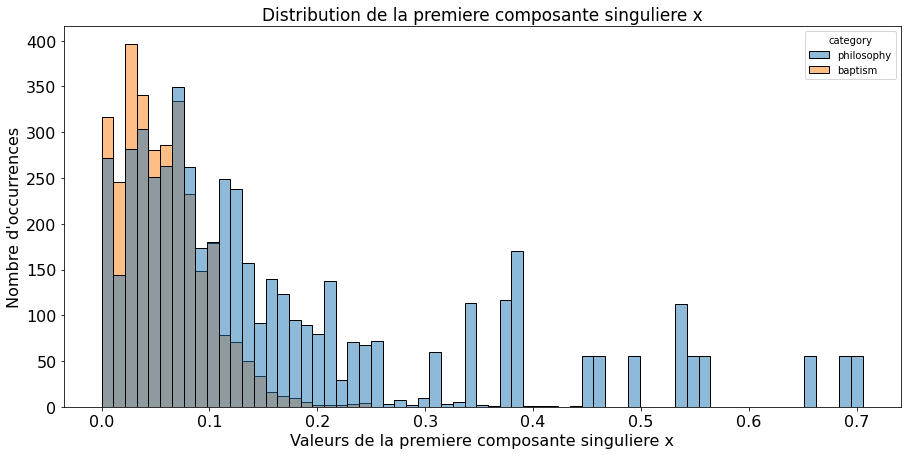

In [321]:
# Distribution des deux composantes singulieres
# Premiere valeur singuliere x
sb.histplot(data=corpus, x="svd_x", hue="category")
plt.xlabel("Valeurs de la premiere composante singuliere x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante singuliere x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(0, 0.6)
# plt.savefig(path)
plt.show()

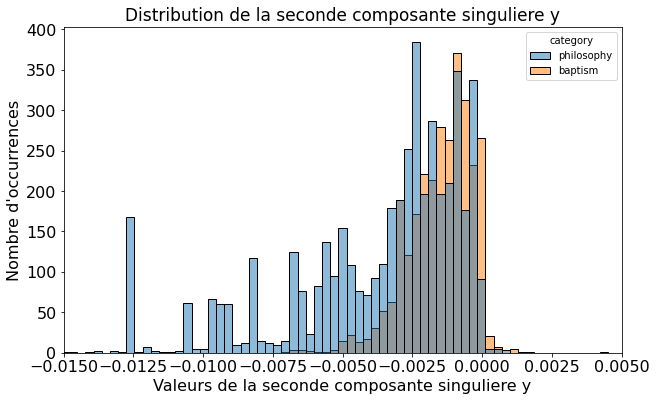

In [331]:
#nouveau
# Distribution des deux composantes singulieres
# Seconde valeur singuliere
# sb.histplot(corpus["svd_2d_y"])
sb.histplot(data=corpus, x="svd_y", hue="category", edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la seconde composante singuliere y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante singuliere y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(-0.015, 0.005)
# plt.savefig(path)
plt.show()

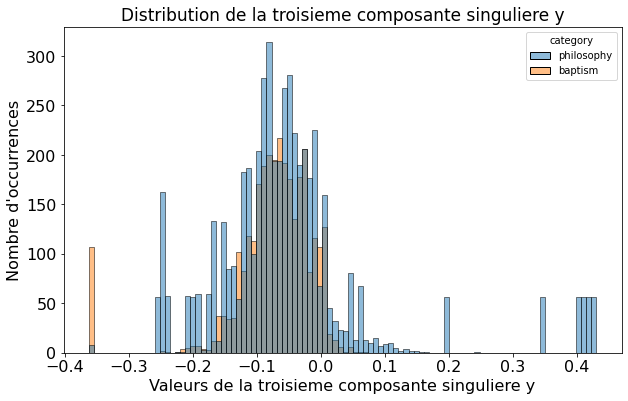

In [278]:
# Distribution des deux composantes singulieres
# Troisieme valeur singuliere
sb.histplot(data=corpus, x="svd_z", hue="category")
plt.xlabel("Valeurs de la troisieme composante singuliere y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la troisieme composante singuliere y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(-0.015, 0.005)
# plt.savefig(path)
plt.show()

In [169]:
corpus.value_counts("category")

category
philosophy    5177
baptism       3051
dtype: int64

(-0.015, 0.005)

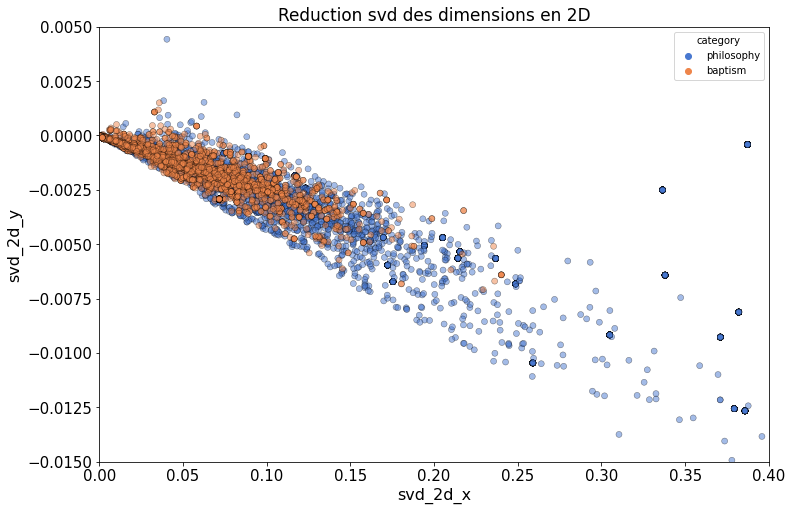

In [195]:
# Plot en 2d du svd
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="svd_2d_x", y="svd_2d_y",
    hue="category",
    edgecolor="black",
    palette=sb.color_palette("muted", 2),
    data=corpus,
    legend="auto",
    alpha=0.5
)
plt.xlabel("svd_2d_x", size=16)
plt.ylabel("svd_2d_y", size=16)
plt.title("Reduction svd des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.4)
plt.ylim(-0.015, 0.005)

(-0.015, 0.005)

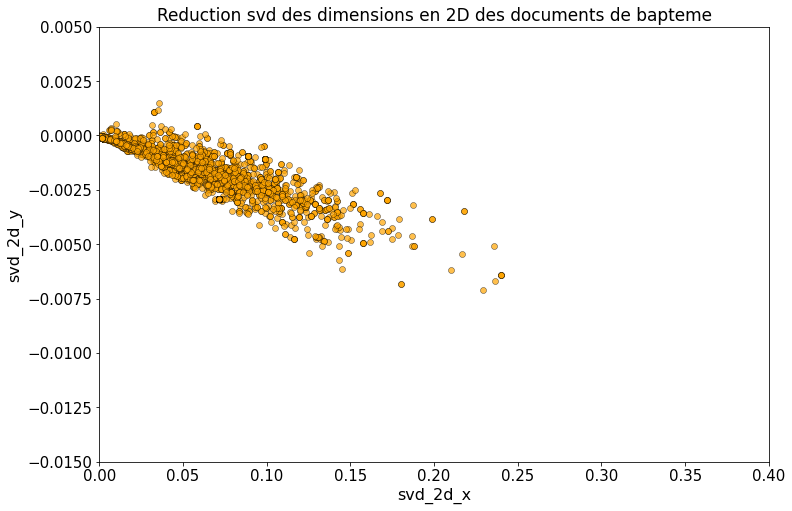

In [193]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="svd_2d_x", y="svd_2d_y",
    palette=sb.color_palette("deep", 1),
    color="orange",
    edgecolor="black",
    data=corpus[corpus["category"] == "baptism"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("svd_2d_x", size=16)
plt.ylabel("svd_2d_y", size=16)
plt.title("Reduction svd des dimensions en 2D des documents de bapteme", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.4)
plt.ylim(-0.015, 0.005)

(-0.015, 0.005)

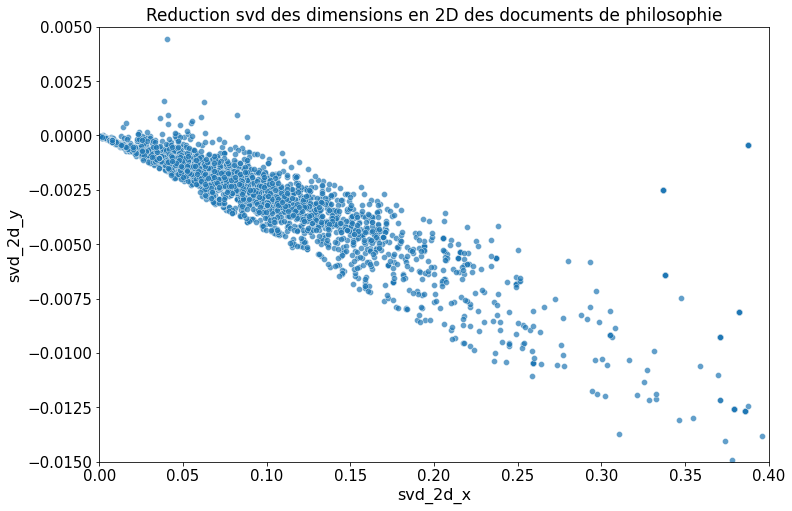

In [187]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="svd_2d_x", y="svd_2d_y",
    palette=sb.color_palette("dark", 2),
    data=corpus[corpus["category"] == "philosophy"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("svd_2d_x", size=16)
plt.ylabel("svd_2d_y", size=16)
plt.title("Reduction svd des dimensions en 2D des documents de philosophie", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.4)
plt.ylim(-0.015, 0.005)

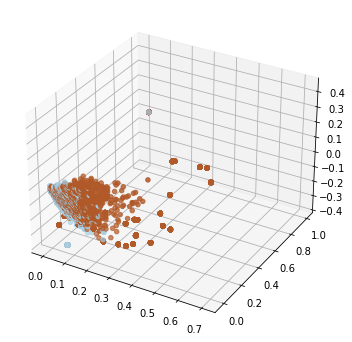

In [210]:
ax = plt.axes(projection='3d')
ax.scatter3D(corpus["svd_2d_x"], corpus["svd_2d_y"], corpus["svd_2d_z"], c=corpus["category_int"], cmap='Paired');



In [213]:
import plotly.express as px
fig = px.scatter_3d(corpus, x='svd_2d_x', y='svd_2d_y', z='svd_2d_z',
              color='category')
fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_zlabel'

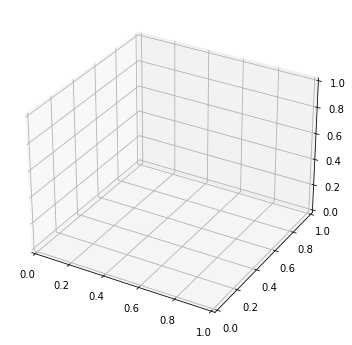

In [205]:
# Plot en 3d du svd
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# fig = plt.figure()
plt.ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("svd_2d_x")
ax.set_ylabel("svd_2d_y")
ax.set_zlabel("svd_2d_z")
# plt.title("Reduction svd des dimensions en 3D", size=17)
ax.scatter(corpus["svd_2d_x"], corpus["svd_2d_y"], corpus["svd_2d_z"])

# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlim(0, 0.4)
# plt.ylim(-0.015, 0.005)

TSNE

In [226]:
#TSNE en 2D
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(X_tfidf)
corpus["tsne_x"] = tsne_results[:,0]
corpus["tsne_y"] = tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8228 samples in 0.003s...
[t-SNE] Computed neighbors for 8228 samples in 2.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8228
[t-SNE] Computed conditional probabilities for sample 2000 / 8228
[t-SNE] Computed conditional probabilities for sample 3000 / 8228
[t-SNE] Computed conditional probabilities for sample 4000 / 8228
[t-SNE] Computed conditional probabilities for sample 5000 / 8228
[t-SNE] Computed conditional probabilities for sample 6000 / 8228
[t-SNE] Computed conditional probabilities for sample 7000 / 8228
[t-SNE] Computed conditional probabilities for sample 8000 / 8228
[t-SNE] Computed conditional probabilities for sample 8228 / 8228
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.836334
[t-SNE] KL divergence after 1000 iterations: 1.628046


In [227]:
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_tfidf.shape)
print("tsne_results.shape =", tsne_results.shape)

corpus.shape = (8228, 12)
X_tfidf.shape = (8228, 12950)
tsne_results.shape = (8228, 2)


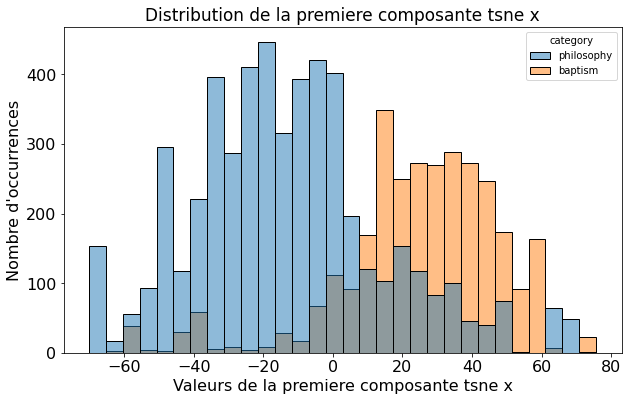

In [279]:
# Distribution des deux composantes tsne
# Premiere composante x
sb.histplot(data=corpus, x="tsne_x", hue="category")
plt.xlabel("Valeurs de la premiere composante tsne x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante tsne x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

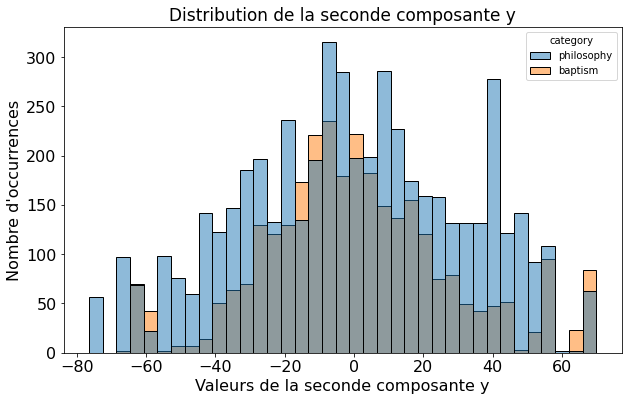

In [280]:
# Distribution des deux composantes singulieres
# Seconde composante singuliere
sb.histplot(data=corpus, x="tsne_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

(array([-100.0000, -80.0000, -60.0000, -40.0000, -20.0000, 0.0000, 20.0000,
        40.0000, 60.0000, 80.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

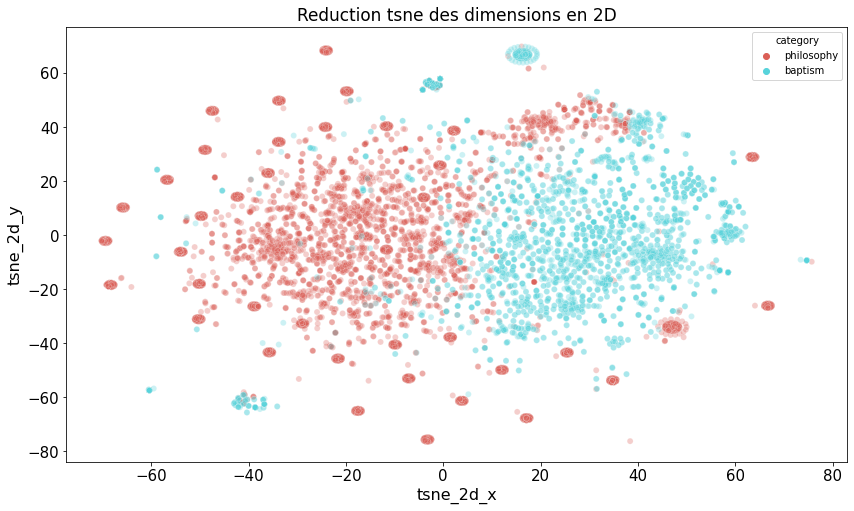

In [252]:
plt.figure(figsize=(14, 8))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("tsne_2d_x", size=16)
plt.ylabel("tsne_2d_y", size=16)
plt.title("Reduction tsne des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [231]:
corpus[corpus["category"] == "baptism"]["tsne_x"]

index
5177    49.702488
5178    25.921888
5179    15.068824
5180    22.437061
5181    10.193416
          ...    
8223    74.703873
8224    58.547352
8225    56.814606
8226    24.443735
8227    -2.145998
Name: tsne_x, Length: 3051, dtype: float32

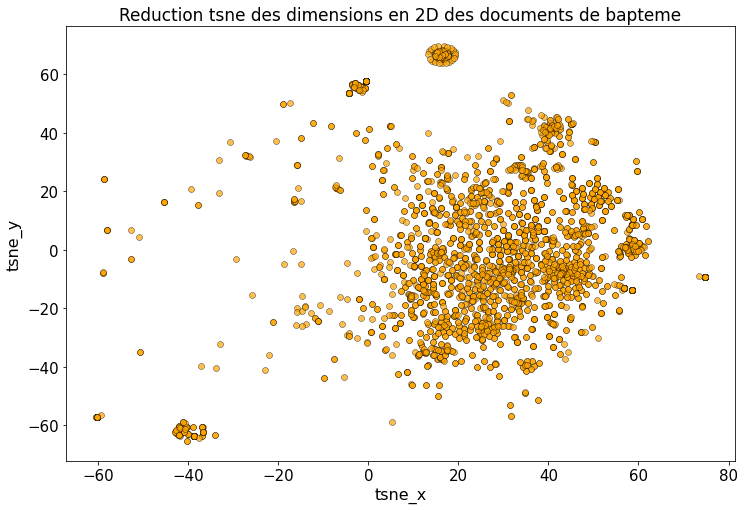

In [239]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    palette=sb.color_palette("deep", 1),
    color="orange",
    edgecolor="black",
    data=corpus[corpus["category"] == "baptism"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("tsne_x", size=16)
plt.ylabel("tsne_y", size=16)
plt.title("Reduction tsne des dimensions en 2D des documents de bapteme", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

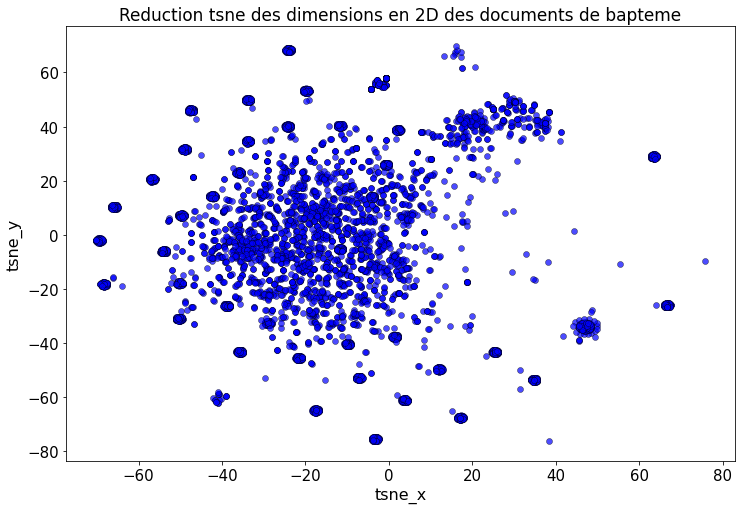

In [241]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    palette=sb.color_palette("deep", 1),
    color="blue",
    edgecolor="black",
    data=corpus[corpus["category"] == "philosophy"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("tsne_x", size=16)
plt.ylabel("tsne_y", size=16)
plt.title("Reduction tsne des dimensions en 2D des documents de bapteme", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [221]:
#TSNE en 3D
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(X_tfidf)
corpus["tsne_x"] = tsne_results[:,0]
corpus["tsne_y"] = tsne_results[:,1]
corpus["tsne_z"] = tsne_results[:,2]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8228 samples in 0.002s...
[t-SNE] Computed neighbors for 8228 samples in 2.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8228
[t-SNE] Computed conditional probabilities for sample 2000 / 8228
[t-SNE] Computed conditional probabilities for sample 3000 / 8228
[t-SNE] Computed conditional probabilities for sample 4000 / 8228
[t-SNE] Computed conditional probabilities for sample 5000 / 8228
[t-SNE] Computed conditional probabilities for sample 6000 / 8228
[t-SNE] Computed conditional probabilities for sample 7000 / 8228
[t-SNE] Computed conditional probabilities for sample 8000 / 8228
[t-SNE] Computed conditional probabilities for sample 8228 / 8228
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.819527
[t-SNE] KL divergence after 1000 iterations: 1.537164


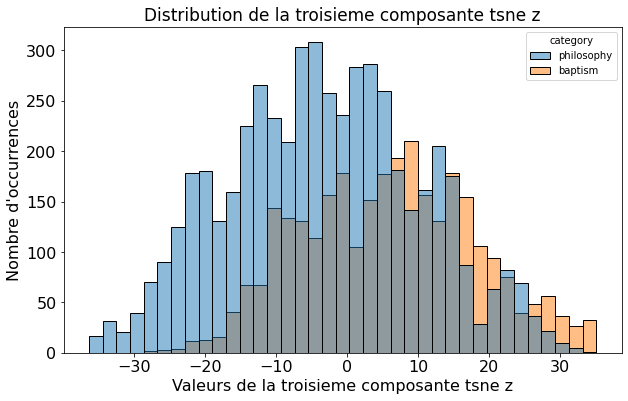

In [284]:
# Distribution des deux composantes tsne
# Troisieme composante z
sb.histplot(data=corpus, x="tsne_z", hue="category")
plt.xlabel("Valeurs de la troisieme composante tsne z", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la troisieme composante tsne z", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

In [223]:
import plotly.express as px
fig = px.scatter_3d(corpus, x='tsne_x', y='tsne_y', z='tsne_z',
              color='category')
fig.show()

UMAP

In [242]:
import umap

In [266]:
#UMAP en 3D
umap_func = umap.UMAP()
umap_results = umap_func.fit_transform(X_tfidf)
corpus["umap_x"] = umap_results[:, 0]
corpus["umap_y"] = umap_results[:, 1]
print("umap_results.shape =", umap_results)
print("umap_results =", umap_results)

umap_results.shape = [[0.8260 0.4635]
 [26.1307 3.0431]
 [23.2039 2.6531]
 ...
 [9.1560 5.1526]
 [4.8341 4.9294]
 [22.0656 -12.2829]]
umap_results = [[0.8260 0.4635]
 [26.1307 3.0431]
 [23.2039 2.6531]
 ...
 [9.1560 5.1526]
 [4.8341 4.9294]
 [22.0656 -12.2829]]


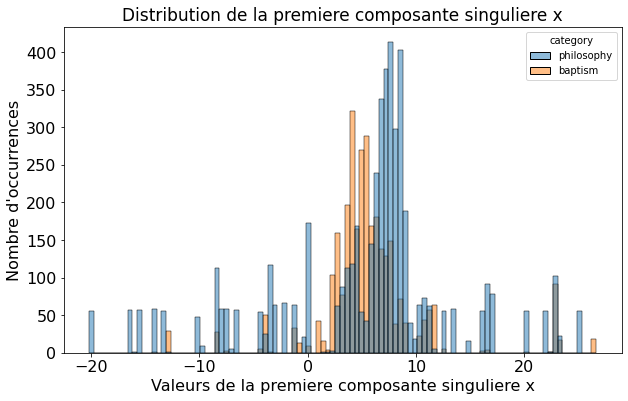

In [264]:
# Distribution des deux composantes singulieres
# Premiere composante x
sb.histplot(data=corpus, x="umap_x", hue="category")
plt.xlabel("Valeurs de la premiere composante singuliere x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante singuliere x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

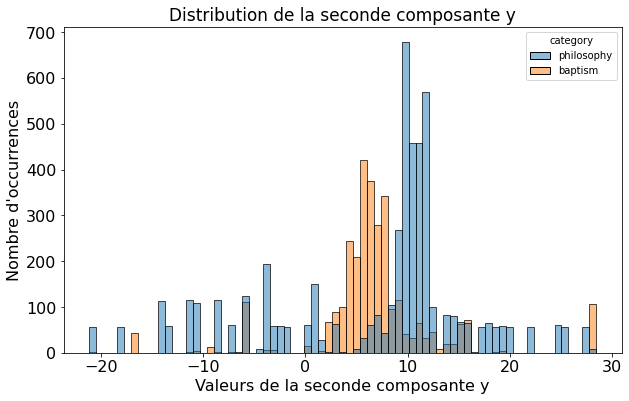

In [265]:
# Distribution des deux composantes singulieres
# Seconde composante singuliere
sb.histplot(data=corpus, x="umap_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

(array([-30.0000, -20.0000, -10.0000, 0.0000, 10.0000, 20.0000, 30.0000,
        40.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

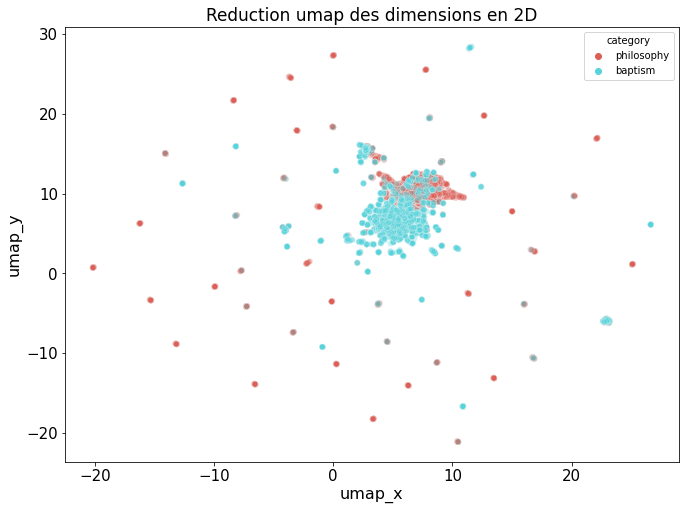

In [262]:
plt.figure(figsize=(11, 8))
sb.scatterplot(
    x="umap_x", y="umap_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("umap_x", size=16)
plt.ylabel("umap_y", size=16)
plt.title("Reduction umap des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Non-negative matrix factorization

In [7]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X_tfidf)
W

array([[0.0315, 0.0000],
       [0.0572, 0.0000],
       [0.0562, 0.0000],
       ...,
       [0.0102, 0.0001],
       [0.0030, 0.0000],
       [0.0000, 0.1592]])

In [8]:
corpus["nmf_x"] = W[:, 0]
corpus["nmf_y"] = W[:, 1]

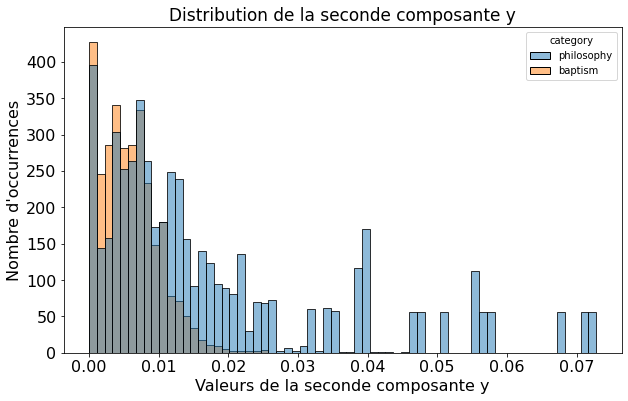

In [11]:
# Distribution des deux composantes nmf
# Seconde composante nmf
sb.histplot(data=corpus, x="nmf_x", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

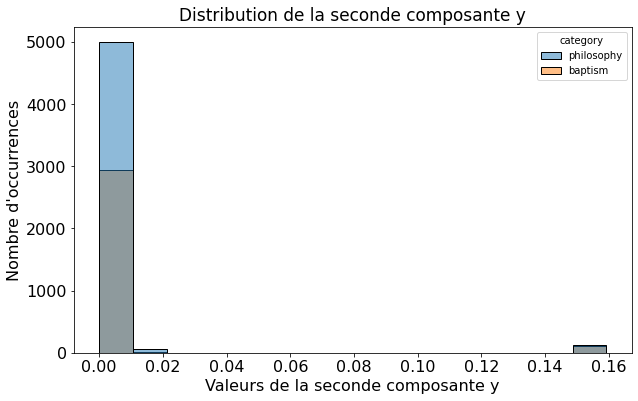

In [14]:
# Distribution des deux composantes nmf
# Seconde composante nmf
sb.histplot(data=corpus, x="nmf_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

(array([-0.0200, 0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200,
        0.1400, 0.1600, 0.1800]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

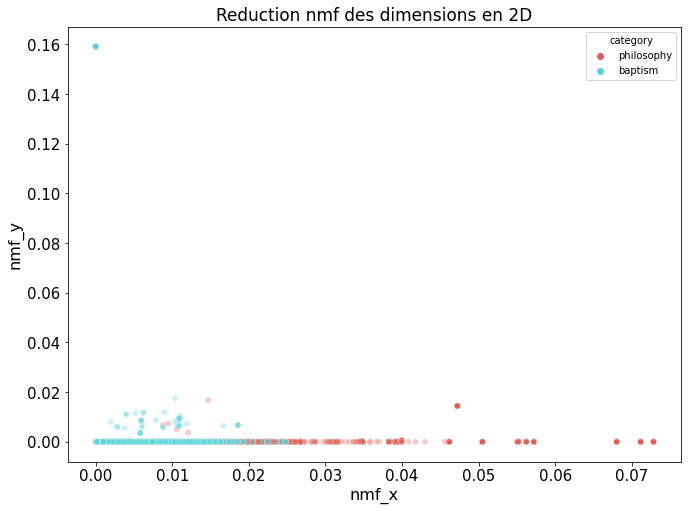

In [9]:
plt.figure(figsize=(11, 8))
sb.scatterplot(
    x="nmf_x", y="nmf_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("nmf_x", size=16)
plt.ylabel("nmf_y", size=16)
plt.title("Reduction nmf des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [310]:
#Test PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# data1
pca = PCA(n_components=2)
X = data1.drop("target", axis=1)
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
X_pca 

array([[-2.6841, 0.3194],
       [-2.7141, -0.1770],
       [-2.8890, -0.1449],
       [-2.7453, -0.3183],
       [-2.7287, 0.3268],
       [-2.2809, 0.7413],
       [-2.8205, -0.0895],
       [-2.6261, 0.1634],
       [-2.8864, -0.5783],
       [-2.6728, -0.1138],
       [-2.5069, 0.6451],
       [-2.6128, 0.0147],
       [-2.7861, -0.2351],
       [-3.2238, -0.5114],
       [-2.6448, 1.1788],
       [-2.3860, 1.3381],
       [-2.6235, 0.8107],
       [-2.6483, 0.3118],
       [-2.1998, 0.8728],
       [-2.5880, 0.5136],
       [-2.3103, 0.3913],
       [-2.5437, 0.4330],
       [-3.2159, 0.1335],
       [-2.3027, 0.0987],
       [-2.3558, -0.0373],
       [-2.5067, -0.1460],
       [-2.4688, 0.1310],
       [-2.5623, 0.3677],
       [-2.6395, 0.3120],
       [-2.6320, -0.1970],
       [-2.5874, -0.2043],
       [-2.4099, 0.4109],
       [-2.6489, 0.8134],
       [-2.5987, 1.0931],
       [-2.6369, -0.1213],
       [-2.8662, 0.0694],
       [-2.6252, 0.5994],
       [-2.8007, 0.2686],

In [306]:
data1[:]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [ ]:
# clustering
# 1. K means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_tfidf)
